# Problem Statement
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

# Observations
1)Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.

2)The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done

In [1]:
import numpy as np 
import pandas as pd
import keras

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_csv("D:\\projects DS\\creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis 

In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

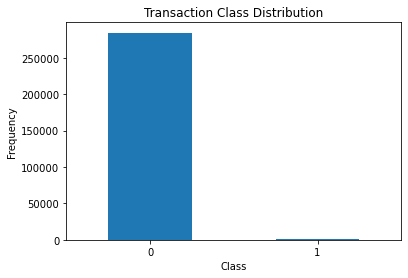

In [7]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")

plt.xlabel("Class")
plt.ylabel("Frequency");

## Data Preprocessing 

In [9]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df['Amount']=SS.fit_transform(df['Amount'].values.reshape(-1,1))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
df.drop(df.columns[0],axis = 1,inplace = True)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


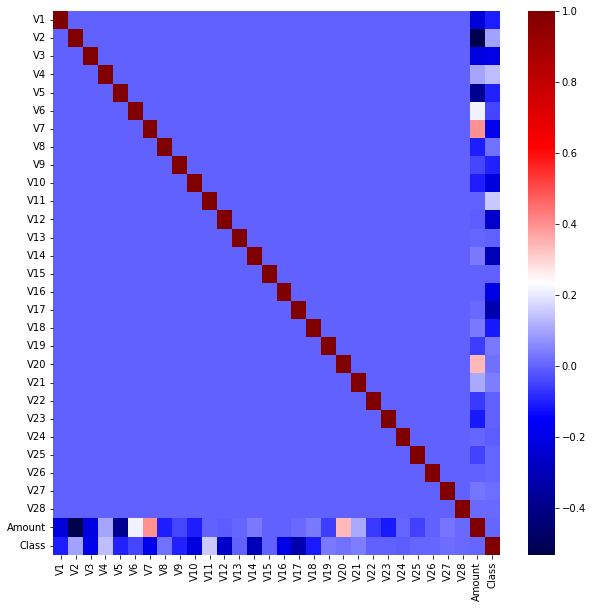

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap="seismic")
plt.show()

In [23]:
X=df.iloc[:,:29]
Y=df.iloc[:,29]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)

# Model building
## Artificial Neural Network

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
model = Sequential([
    Dense(units=16,input_dim=29,activation='relu'),
    Dense(units=25,activation='relu'),
    Dropout(0.3),
    Dense(40,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 25)                425       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size = 30,epochs = 10)

Epoch 1/10
6646/6646 [==============================] - 8s 1ms/step - loss: 0.0020 - accuracy: 0.9996
Epoch 2/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 3/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 4/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 5/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 6/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 7/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 8/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 9/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 10/10
6646/6646 [==============================] - 7s 1ms/step - loss: 0.001

In [24]:
score=model.evaluate(X_test,Y_test)

2671/2671 [==============================] - 2s 866us/step - loss: 0.0059 - accuracy: 0.9994


In [25]:
print(score)

[0.0059227244928479195, 0.999426543712616]


In [26]:
Y_pred_test = model.predict(X_test)


2671/2671 [==============================] - 2s 756us/step


In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred_test.round())

print('test_accuracy',accuracy_score(Y_test,Y_pred_test.round()))


test_accuracy 0.9994265182636377


In [28]:
print(cm)

[[85286    10]
 [   39   108]]


In [29]:
Y_pred = model.predict(X)
cm = confusion_matrix(Y,Y_pred.round())
print(cm)

8901/8901 [==============================] - 6s 725us/step
[[284292     23]
 [   102    390]]


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,max_samples=0.5,max_features=0.6,random_state=0,max_depth=(3)) 
RFC.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, max_features=0.6, max_samples=0.5,
                       n_estimators=50, random_state=0)

In [31]:
Y_pred_train = RFC.predict(X_train) 
Y_pred_test = RFC.predict(X_test)

In [32]:
print("Training accuracy: ",accuracy_score(Y_train,Y_pred_train).round(4))
print("Test accuracy: ",accuracy_score(Y_test,Y_pred_test).round(4))

Training accuracy:  0.9994
Test accuracy:  0.9993


In [33]:
Y_pred = RFC.predict(X)

In [34]:
print("Test accuracy: ",accuracy_score(Y,Y_pred).round(4))

Test accuracy:  0.9994


In [35]:
cm = confusion_matrix(Y,Y_pred.round())
print(cm)

[[284263     52]
 [   130    362]]


## Descition tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=(6)) 
dt.fit(X_train, Y_train)
Y_pred_train = dt.predict(X_train) 
Y_pred_test = dt.predict(X_test) 
print("Training Accuracy: ",accuracy_score(Y_train,Y_pred_train).round(4))
print("Test Accuracy: ",accuracy_score(Y_test,Y_pred_test).round(4))

Training Accuracy:  0.9997
Test Accuracy:  0.9995


In [37]:
Y_pred = dt.predict(X)

In [38]:
cm = confusion_matrix(Y,Y_pred)

In [39]:
print(cm)

[[284296     19]
 [    87    405]]


## Under sampling

In [40]:
fraud_indices = np.array(df[df.Class == 1].index)
num_fraud_indices = len(fraud_indices)
print(num_fraud_indices)

492


In [41]:
normal_indices = df[df.Class ==0].index

In [42]:
random_normal_indices = np.random.choice(normal_indices,num_fraud_indices,replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [43]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [44]:
under_sample_data = df.iloc[under_sample_indices,:]

In [45]:
under_sample_data.shape

(984, 30)

In [46]:
X_under_sam=under_sample_data.iloc[:,:29]
Y_under_sam=under_sample_data.iloc[:,29]

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X_under_sam,Y_under_sam,test_size = 0.3,random_state=0)

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 25)                425       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 40)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,986
Trainable params: 1,986
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size = 30,epochs = 10)

Epoch 1/10
23/23 [==============================] - 1s 1ms/step - loss: 0.4339 - accuracy: 0.9157
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9317
Epoch 3/10
23/23 [==============================] - 0s 1ms/step - loss: 0.1584 - accuracy: 0.9390
Epoch 4/10
23/23 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9448
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9491
Epoch 6/10
23/23 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9520
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9549
Epoch 8/10
23/23 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9593
Epoch 9/10
23/23 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.9549
Epoch 10/10
23/23 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9564


In [50]:
Y_pred_test = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test,Y_pred_test.round())
print(cm)
print('test_accuracy',accuracy_score(Y_test,Y_pred_test.round()))

[[149   0]
 [ 14 133]]
test_accuracy 0.9527027027027027


In [52]:
Y_pred = model.predict(X)

8901/8901 [==============================] - 7s 798us/step


In [53]:

cm = confusion_matrix(Y,Y_pred.round())
print(cm)
print('total_accuracy',accuracy_score(Y,Y_pred.round()))

[[283731    584]
 [    40    452]]
total_accuracy 0.9978090426148234


## Over sampling

In [49]:
#pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
Oversample = SMOTE()
X_resample,Y_resample =Oversample.fit_resample(X,Y)

In [56]:
X_resample.shape

(568630, 29)

<AxesSubplot:xlabel='Class', ylabel='count'>

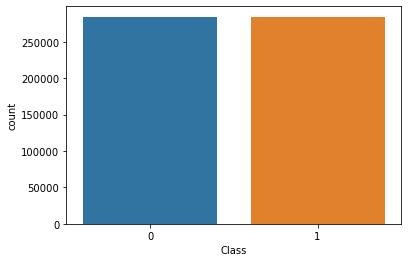

In [59]:
sns.countplot(x=Y_resample)

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resample,Y_resample,test_size = 0.3,random_state=0)

In [61]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size = 30,epochs = 10)

Epoch 1/10
13269/13269 [==============================] - 17s 1ms/step - loss: 0.0256 - accuracy: 0.9910
Epoch 2/10
13269/13269 [==============================] - 16s 1ms/step - loss: 0.0113 - accuracy: 0.9968
Epoch 3/10
13269/13269 [==============================] - 18s 1ms/step - loss: 0.0092 - accuracy: 0.9976
Epoch 4/10
13269/13269 [==============================] - 15s 1ms/step - loss: 0.0077 - accuracy: 0.9981
Epoch 5/10
13269/13269 [==============================] - 15s 1ms/step - loss: 0.0069 - accuracy: 0.9983
Epoch 6/10
13269/13269 [==============================] - 15s 1ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 7/10
13269/13269 [==============================] - 15s 1ms/step - loss: 0.0059 - accuracy: 0.9986
Epoch 8/10
13269/13269 [==============================] - 15s 1ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 9/10
13269/13269 [==============================] - 15s 1ms/step - loss: 0.0055 - accuracy: 0.9988
Epoch 10/10
13269/13269 [==============================

In [62]:
Y_pred_test = model.predict(X_test)

5331/5331 [==============================] - 4s 798us/step


In [63]:
cm = confusion_matrix(Y_test,Y_pred_test.round())
print(cm)
print('test_accuracy',accuracy_score(Y_test,Y_pred_test.round()))

[[84963   209]
 [    0 85417]]
test_accuracy 0.9987748330783345


In [64]:
Y_pred = model.predict(X)

8901/8901 [==============================] - 7s 736us/step


In [65]:
cm = confusion_matrix(Y,Y_pred.round())
print(cm)

[[283703    612]
 [     0    492]]


In [66]:
print('total_accuracy',accuracy_score(Y,Y_pred.round()))

total_accuracy 0.9978511764106921


## Job done!
From this above matrix the model is maid which predicts in such a way that not even 1 fraud transaction is predicted as non-fraud transactions which is very much important in this case to reduce false negative